# FactBook Data Exploration and Initial Data Processing

__In this notebook file we preprocessed and show initial statistic plots for some features of FactBook data.
We first dowloaded json files for all countries then filtered it by selecting only 20 countries which are in the Now corpus data set including news articles (our second data set). This notebook includes only the data exploration of the factbook data, where we have different geographic, national, economical, social, political and environmental facts about each country. In the initial part we selected only 20 countries and created a proper data frame including 25 features that we decided to work on. In the second part we preprocessed some interesting facts and plot these features per each country. __

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlb
import seaborn as sns
from datetime import datetime, date, time
from pandas import DataFrame as df
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')
import os
import glob

### PART 1 : READ AND FILTER DATA SELECT PRE-DETERMINED FEATURES OF INTEREST

In [2]:
#Read data folder of fact book
DATA_FOLDER = '../Data'

In [3]:
#Determine country list codes(as presented in factbook) that are included in Now Corpus
country_List=['US', 'EI' ,'AS' ,'UK' ,'CA', 'IN' ,'NZ' ,'SF', 'LK', 'SN', 'PH' ,'GH', 'NI', 'KE',
 'HK', 'JM', 'PK' ,'BG', 'MY' ,'TZ']
#convert the country names to lower cases
country_List=[x.lower() for x in country_List]

In [4]:
#check how many country we have
len(country_List)

20

In [5]:
#check what is inside the factbook data folder 
folders_list=os.listdir(DATA_FOLDER+"/factbook")

In [6]:
folders_list

['README.md',
 'south-america',
 'package.json',
 'oceans',
 'world',
 'ALMANAC.md',
 'south-asia',
 '.git',
 'NOTES.md',
 'australia-oceania',
 'MONGO.md',
 'europe',
 'central-asia',
 'central-america-n-caribbean',
 'north-america',
 'LICENSE.md',
 'middle-east',
 'africa',
 'meta',
 'SUMMARY.md',
 'antarctica',
 'east-n-southeast-asia']

In [7]:
#Get Per country json files from factbook data
countryData_List=glob.glob(DATA_FOLDER+"/factbook/*/*.json")

In [8]:
#filter out only the selected countries data
ourcountries=[]
for i in country_List:
    for j in countryData_List:
        if i in j[len(j)-7:]:
            ourcountries.append(j)     

In [9]:
#check the json file list of selected countries
ourcountries

['../Data/factbook/north-america/us.json',
 '../Data/factbook/europe/ei.json',
 '../Data/factbook/australia-oceania/as.json',
 '../Data/factbook/europe/uk.json',
 '../Data/factbook/north-america/ca.json',
 '../Data/factbook/south-asia/in.json',
 '../Data/factbook/australia-oceania/nz.json',
 '../Data/factbook/africa/sf.json',
 '../Data/factbook/south-asia/lk.json',
 '../Data/factbook/east-n-southeast-asia/sn.json',
 '../Data/factbook/east-n-southeast-asia/ph.json',
 '../Data/factbook/africa/gh.json',
 '../Data/factbook/africa/ni.json',
 '../Data/factbook/africa/ke.json',
 '../Data/factbook/east-n-southeast-asia/hk.json',
 '../Data/factbook/central-america-n-caribbean/jm.json',
 '../Data/factbook/south-asia/pk.json',
 '../Data/factbook/south-asia/bg.json',
 '../Data/factbook/east-n-southeast-asia/my.json',
 '../Data/factbook/africa/tz.json']

In [10]:
len(ourcountries)

20

In [11]:
#Append all countries data files
worldFactRaw=[]
worldFactRaw.append([pd.read_json(f) for f in ourcountries])
countries=worldFactRaw[0]

In [12]:
#check how many country data we have
len(countries)

20

In [13]:
for p in countries:
    print(p['Government']['Country name']['conventional short form']['text'])

United States
Ireland
Australia
United Kingdom
Canada
India
New Zealand
South Africa
Sri Lanka
Singapore
Philippines
Ghana
Nigeria
Kenya
Hong Kong
Jamaica
Pakistan
Bangladesh
Malaysia
Tanzania


### Check how each features look like

In [14]:
x=''
factBookCheck = df([p['Government']['Country name']['conventional short form']['text'], 
        p['Geography'][{'Geographic coordinates'}][0]['text'],
        p['Geography'][{'Natural hazards'}][0]['text'],
        p['Geography'][{'Environment - current issues'}][0]['text'],
        p['People and Society'][{'Population'}][0]['text'],
        p['People and Society'][{'Age structure'}][0],
        p['People and Society'][{'Religions'}][0]['text'],
        p['People and Society'][{'Ethnic groups'}][0]['text'],
        p['People and Society'][{'Median age'}][0],
        p['People and Society'][{'Population growth rate'}][0]['text'],
        p['People and Society'][{'Birth rate'}][0]['text'],
        p['People and Society'][{'Death rate'}][0]['text'],
        p['People and Society'][{'Net migration rate'}][0]['text'],
        p['People and Society'][{'Sex ratio'}][0],
        p['People and Society'][{'Life expectancy at birth'}][0],
        p['Government'][{'Executive branch'}][0],
        p['Government'][{'Legislative branch'}][0],
        p['Economy'][{'GDP - per capita (PPP)'}][0]['text'],
        p['Economy'][{'Unemployment rate'}][0]['text'],
        p['Economy'][{'Population below poverty line'}][0],
        p['Economy'][{'Inflation rate (consumer prices)'}][0]['text'],
        p['Energy'][{'Electricity - from other renewable sources'}][0]['text'],
        p['Energy'][{'Carbon dioxide emissions from consumption of energy'}][0]['text'],
        p['Communications'][{'Internet users'}][0]['percent of population']['text']
        ]
       
        for p in countries)


In [15]:
#Country List
factBookCheck[0]

0      United States
1            Ireland
2          Australia
3     United Kingdom
4             Canada
5              India
6        New Zealand
7       South Africa
8          Sri Lanka
9          Singapore
10       Philippines
11             Ghana
12           Nigeria
13             Kenya
14         Hong Kong
15           Jamaica
16          Pakistan
17        Bangladesh
18          Malaysia
19          Tanzania
Name: 0, dtype: object

In [16]:
#Geographic coordination
factBookCheck[1]

0      38 00 N, 97 00 W
1       53 00 N, 8 00 W
2     27 00 S, 133 00 E
3       54 00 N, 2 00 W
4      60 00 N, 95 00 W
5      20 00 N, 77 00 E
6     41 00 S, 174 00 E
7      29 00 S, 24 00 E
8       7 00 N, 81 00 E
9      1 22 N, 103 48 E
10    13 00 N, 122 00 E
11       8 00 N, 2 00 W
12      10 00 N, 8 00 E
13      1 00 N, 38 00 E
14    22 15 N, 114 10 E
15     18 15 N, 77 30 W
16     30 00 N, 70 00 E
17     24 00 N, 90 00 E
18     2 30 N, 112 30 E
19      6 00 S, 35 00 E
Name: 1, dtype: object

In [17]:
#Natural hazards
factBookCheck[2]

0     tsunamis; volcanoes; earthquake activity aroun...
1                                                    NA
2     cyclones along the coast; severe droughts; for...
3                             winter windstorms; floods
4     continuous permafrost in north is a serious ob...
5     droughts; flash floods, as well as widespread ...
6     earthquakes are common, though usually not sev...
7                                    prolonged droughts
8                     occasional cyclones and tornadoes
9                                                    NA
10    astride typhoon belt, usually affected by 15 a...
11    dry, dusty, northeastern harmattan winds from ...
12                          periodic droughts; flooding
13     recurring drought; flooding during rainy seasons
14                                  occasional typhoons
15             hurricanes (especially July to November)
16    frequent earthquakes, occasionally severe espe...
17    droughts; cyclones; much of the country ro

In [18]:
#Environmental Issues of one country
factBookCheck[3][2]

'soil erosion from overgrazing, industrial development, urbanization, and poor farming practices; soil salinity rising due to the use of poor quality water; desertification; clearing for agricultural purposes threatens the natural habitat of many unique animal and plant species; the Great Barrier Reef off the northeast coast, the largest coral reef in the world, is threatened by increased shipping and its popularity as a tourist site; limited natural freshwater resources'

In [19]:
#Population
factBookCheck[4]

0        323,995,528 (July 2016 est.)
1          4,952,473 (July 2016 est.)
2         22,992,654 (July 2016 est.)
3         64,430,428 (July 2016 est.)
4         35,362,905 (July 2016 est.)
5      1,266,883,598 (July 2016 est.)
6          4,474,549 (July 2016 est.)
7                          54,300,704
8     22.235 million (July 2016 est.)
9          5,781,728 (July 2016 est.)
10       102,624,209 (July 2016 est.)
11                         26,908,262
12                        186,053,386
13                         46,790,758
14         7,167,403 (July 2016 est.)
15         2,970,340 (July 2016 est.)
16       201,995,540 (July 2016 est.)
17       156,186,882 (July 2016 est.)
18        30,949,962 (July 2016 est.)
19                         52,482,726
Name: 4, dtype: object

In [20]:
#Age structure
factBookCheck[5][3]

{'0-14 years': {'text': '17.44% (male 5,761,311/female 5,476,649)'},
 '15-24 years': {'text': '12.15% (male 3,997,150/female 3,830,268)'},
 '25-54 years': {'text': '40.74% (male 13,367,242/female 12,883,674)'},
 '55-64 years': {'text': '11.77% (male 3,760,020/female 3,820,525)'},
 '65 years and over': {'text': '17.9% (male 5,170,542/female 6,363,047) (2016 est.)'}}

In [21]:
#Religions
factBookCheck[6][0]

"Protestant 46.5%, Roman Catholic 20.8%, Mormon 1.6%, Jehovah's Witness 0.8%, other Christian 0.9%, Jewish 1.9%, Muslim 0.9%, Buddhist 0.7%, Hindu 0.7%, other 1.8%, unaffiliated 22.8%, don't know/refused 0.6% (2014 est.)"

In [22]:
#Ethnic groups
factBookCheck[7][1]

'Irish 84.5%, other white 9.8%, Asian 1.9%, black 1.4%, mixed and other 0.9%, unspecified 1.6% (2011 est.)'

In [23]:
#Median Age
factBookCheck[8][2]

{'total': {'text': '38.6 years'},
 'male': {'text': '37.8 years'},
 'female': {'text': '39.4 years (2016 est.)'}}

In [24]:
#Population Growth Rate
factBookCheck[9]

0     0.81% (2016 est.)
1      1.2% (2016 est.)
2     1.05% (2016 est.)
3     0.53% (2016 est.)
4     0.74% (2016 est.)
5     1.19% (2016 est.)
6      0.8% (2016 est.)
7     0.99% (2016 est.)
8      0.8% (2016 est.)
9     1.86% (2016 est.)
10    1.59% (2016 est.)
11    2.18% (2016 est.)
12    2.44% (2016 est.)
13    1.81% (2016 est.)
14    0.35% (2016 est.)
15    0.68% (2016 est.)
16    1.45% (2016 est.)
17    1.05% (2016 est.)
18     1.4% (2016 est.)
19    2.77% (2016 est.)
Name: 9, dtype: object

In [25]:
#Birth Rate
factBookCheck[10]

0     12.5 births/1,000 population (2016 est.)
1     14.5 births/1,000 population (2016 est.)
2     12.1 births/1,000 population (2016 est.)
3     12.1 births/1,000 population (2016 est.)
4     10.3 births/1,000 population (2016 est.)
5     19.3 births/1,000 population (2016 est.)
6     13.3 births/1,000 population (2016 est.)
7     20.5 births/1,000 population (2016 est.)
8     15.5 births/1,000 population (2016 est.)
9      8.4 births/1,000 population (2016 est.)
10      24 births/1,000 population (2016 est.)
11    30.8 births/1,000 population (2016 est.)
12    37.3 births/1,000 population (2016 est.)
13    25.1 births/1,000 population (2016 est.)
14     9.1 births/1,000 population (2016 est.)
15      18 births/1,000 population (2016 est.)
16    22.3 births/1,000 population (2016 est.)
17      19 births/1,000 population (2016 est.)
18    19.4 births/1,000 population (2016 est.)
19      36 births/1,000 population (2016 est.)
Name: 10, dtype: object

In [26]:
#Death Rate
factBookCheck[11]

0      8.2 deaths/1,000 population (2016 est.)
1      6.5 deaths/1,000 population (2016 est.)
2      7.2 deaths/1,000 population (2016 est.)
3      9.4 deaths/1,000 population (2016 est.)
4      8.5 deaths/1,000 population (2016 est.)
5      7.3 deaths/1,000 population (2016 est.)
6      7.4 deaths/1,000 population (2016 est.)
7      9.6 deaths/1,000 population (2016 est.)
8      6.2 deaths/1,000 population (2016 est.)
9      3.5 deaths/1,000 population (2016 est.)
10     6.1 deaths/1,000 population (2016 est.)
11     7.1 deaths/1,000 population (2016 est.)
12    12.7 deaths/1,000 population (2016 est.)
13     6.8 deaths/1,000 population (2016 est.)
14     7.2 deaths/1,000 population (2016 est.)
15     6.7 deaths/1,000 population (2016 est.)
16     6.4 deaths/1,000 population (2016 est.)
17     5.3 deaths/1,000 population (2016 est.)
18     5.1 deaths/1,000 population (2016 est.)
19     7.8 deaths/1,000 population (2016 est.)
Name: 11, dtype: object

In [27]:
#Migration rate
factBookCheck[12]

0      3.9 migrant(s)/1,000 population (2016 est.)
1        4 migrant(s)/1,000 population (2016 est.)
2      5.6 migrant(s)/1,000 population (2016 est.)
3      2.5 migrant(s)/1,000 population (2016 est.)
4      5.7 migrant(s)/1,000 population (2016 est.)
5        0 migrant(s)/1,000 population (2016 est.)
6      2.2 migrant(s)/1,000 population (2016 est.)
7     -0.9 migrant(s)/1,000 population (2016 est.)
8     -1.3 migrant(s)/1,000 population (2016 est.)
9     13.6 migrant(s)/1,000 population (2016 est.)
10      -2 migrant(s)/1,000 population (2016 est.)
11    -1.9 migrant(s)/1,000 population (2016 est.)
12    -0.2 migrant(s)/1,000 population (2016 est.)
13    -0.2 migrant(s)/1,000 population (2016 est.)
14     1.7 migrant(s)/1,000 population (2016 est.)
15    -4.5 migrant(s)/1,000 population (2016 est.)
16    -1.4 migrant(s)/1,000 population (2016 est.)
17    -3.1 migrant(s)/1,000 population (2016 est.)
18    -0.3 migrant(s)/1,000 population (2016 est.)
19    -0.5 migrant(s)/1,000 pop

In [28]:
#Sex Ratio
factBookCheck[13][2]

{'at birth': {'text': '1.06 male(s)/female'},
 '0-14 years': {'text': '1.05 male(s)/female'},
 '15-24 years': {'text': '1.05 male(s)/female'},
 '25-54 years': {'text': '1.04 male(s)/female'},
 '55-64 years': {'text': '0.98 male(s)/female'},
 '65 years and over': {'text': '0.86 male(s)/female'},
 'total population': {'text': '1.01 male(s)/female (2016 est.)'}}

In [29]:
#Life expectancy at birth
factBookCheck[14][3]

{'total population': {'text': '80.7 years'},
 'male': {'text': '78.5 years'},
 'female': {'text': '83 years (2016 est.)'}}

In [30]:
#Executive branch
factBookCheck[15][1]

{'chief of state': {'text': 'President Michael D. HIGGINS (since 11 November 2011)'},
 'head of government': {'text': 'Taoiseach (Prime Minister) Enda KENNY (since 9 March 2011); reelected prime minister on 6 May 2016'},
 'cabinet': {'text': 'Cabinet nominated by the prime minister, appointed by the president, approved by the Dali Eireann (lower house of Parliament)'},
 'elections/appointments': {'text': 'president directly elected by majority popular vote for a 7-year term (eligible for a second term); election last held on 29 October 2011 (next to be held in October 2018); taoiseach (prime minister) nominated by the House of Representatives (Dail Eireann), appointed by the president'},
 'election results': {'text': 'Michael D. HIGGINS elected president; percent of vote - Michael D. HIGGINS (Labor Party) 39.6%, Sean GALLAGHER (independent) 28.5%, Martin MCGUINNESS (Sinn Fein) 13.7%, Gay MITCHELL (Fine Gael) 6.4%, David NORRIS (independent) 6.2%, other 5.6%'}}

In [31]:
#Legislative branch
factBookCheck[16][2]

{'description': {'text': 'bicameral Federal Parliament consists of the Senate (76 seats; 12 members from each of the 6 states and 2 each from the 2 mainland territories; members directly elected in multi-seat constituencies by proportional representation vote; members serve 6-year terms with one-half of state membership renewed every 3 years and territory membership renewed every 3 years) and the House of Representatives (150 seats; members directly elected in single-seat constituencies by majority preferential vote; members serve terms of up to 3 years)'},
 'elections': {'text': 'Senate - last held on 2 July 2016; House of Representatives - last held on 2 July 2016; this election represents a rare double dissolution where all 226 seats in both the Senate and House of Representatives are up for reelection'},
 'election results': {'text': "Senate - percent of vote by party NA - awaiting final results; seats by party NA - awaiting final results; House of Representatives - percent of vote

In [32]:
#GDP - per capita (PPP)
factBookCheck[17]

0     $57,300 (2016 est.) ++ $56,800 (2015 est.) ++ ...
1     $69,400 (2016 est.) ++ $66,700 (2015 est.) ++ ...
2     $48,800 (2016 est.) ++ $48,300 (2015 est.) ++ ...
3     $42,500 (2016 est.) ++ $42,000 (2015 est.) ++ ...
4     $46,200 (2016 est.) ++ $46,200 (2015 est.) ++ ...
5     $6,700 (2016 est.) ++ $6,300 (2015 est.) ++ $5...
6     $37,100 (2016 est.) ++ $36,600 (2015 est.) ++ ...
7     $13,200 (2016 est.) ++ $13,400 (2015 est.) ++ ...
8     $11,200 (2016 est.) ++ $10,700 (2015 est.) ++ ...
9     $87,100 (2016 est.) ++ $86,500 (2015 est.) ++ ...
10    $7,700 (2016 est.) ++ $7,400 (2015 est.) ++ $7...
11    $4,400 (2016 est.) ++ $4,300 (2015 est.) ++ $4...
12    $5,900 (2016 est.) ++ $6,200 (2015 est.) ++ $6...
13    $3,400 (2016 est.) ++ $3,300 (2015 est.) ++ $3...
14    $58,100 (2016 est.) ++ $57,600 (2015 est.) ++ ...
15    $9,000 (2016 est.) ++ $8,900 (2015 est.) ++ $8...
16    $5,100 (2016 est.) ++ $5,000 (2015 est.) ++ $4...
17    $3,900 (2016 est.) ++ $3,700 (2015 est.) +

In [33]:
#Unemployment rate
factBookCheck[18]

0       4.7% (2016 est.) ++ 5.3% (2015 est.)
1         8% (2016 est.) ++ 9.5% (2015 est.)
2       5.8% (2016 est.) ++ 6.1% (2015 est.)
3       5.1% (2016 est.) ++ 5.4% (2015 est.)
4       7.1% (2016 est.) ++ 6.9% (2015 est.)
5       8.4% (2016 est.) ++ 8.4% (2015 est.)
6       5.1% (2016 est.) ++ 5.4% (2015 est.)
7     26.8% (2016 est.) ++ 25.4% (2015 est.)
8       4.5% (2016 est.) ++ 4.7% (2015 est.)
9       2.1% (2016 est.) ++ 1.9% (2015 est.)
10      6.6% (2016 est.) ++ 6.3% (2015 est.)
11                          5.2% (2013 est.)
12     23.9% (2011 est.) ++ 4.9% (2011 est.)
13        40% (2013 est.) ++ 40% (2001 est.)
14      3.6% (2016 est.) ++ 3.3% (2015 est.)
15      13.8% (2016 est.) ++ 14% (2015 est.)
16      6.7% (2016 est.) ++ 6.4% (2015 est.)
17      4.9% (2016 est.) ++ 4.9% (2015 est.)
18      3.3% (2016 est.) ++ 3.2% (2015 est.)
19                                       NA%
Name: 18, dtype: object

In [34]:
#Population below poverty line
factBookCheck[19]

0                         {'text': '15.1% (2010 est.)'}
1                          {'text': '8.2% (2013 est.)'}
2                                       {'text': 'NA%'}
3                           {'text': '15% (2013 est.)'}
4     {'text': '9.4%', 'note': {'text': 'this figure...
5                         {'text': '29.8% (2010 est.)'}
6                                       {'text': 'NA%'}
7                         {'text': '35.9% (2012 est.)'}
8                          {'text': '8.9% (2010 est.)'}
9                                       {'text': 'NA%'}
10                        {'text': '25.2% (2012 est.)'}
11                        {'text': '24.2% (2013 est.)'}
12                          {'text': '70% (2010 est.)'}
13                        {'text': '43.4% (2012 est.)'}
14                        {'text': '19.6% (2012 est.)'}
15                        {'text': '16.5% (2009 est.)'}
16                      {'text': '22.3% (FY2005 est.)'}
17                        {'text': '31.5% (2010 

In [35]:
#Inflation rate (consumer prices)
factBookCheck[20]

0       1.3% (2016 est.) ++ 0.1% (2015 est.)
1         0.2% (2016 est.) ++ 0% (2015 est.)
2       1.4% (2016 est.) ++ 1.5% (2015 est.)
3         0.5% (2016 est.) ++ 0% (2015 est.)
4       1.6% (2016 est.) ++ 1.1% (2015 est.)
5       5.6% (2016 est.) ++ 4.9% (2015 est.)
6       0.6% (2016 est.) ++ 0.3% (2015 est.)
7       6.5% (2016 est.) ++ 4.5% (2015 est.)
8       4.3% (2016 est.) ++ 0.9% (2015 est.)
9     -0.8% (2016 est.) ++ -0.5% (2015 est.)
10      1.7% (2016 est.) ++ 1.3% (2015 est.)
11    17.8% (2016 est.) ++ 17.2% (2015 est.)
12       15.3% (2016 est.) ++ 9% (2015 est.)
13      6.1% (2016 est.) ++ 6.6% (2015 est.)
14        2.6% (2016 est.) ++ 3% (2015 est.)
15      2.5% (2016 est.) ++ 3.7% (2015 est.)
16      3.7% (2016 est.) ++ 2.5% (2015 est.)
17      5.6% (2016 est.) ++ 6.2% (2015 est.)
18        2% (2016 est.) ++ 2.1% (2015 est.)
19      5.2% (2016 est.) ++ 5.6% (2015 est.)
Name: 20, dtype: object

In [36]:
#Electricity - from other renewable sources
factBookCheck[21]

0          7.4% of total installed capacity (2012 est.)
1           25% of total installed capacity (2013 est.)
2          7.6% of total installed capacity (2012 est.)
3         12.2% of total installed capacity (2014 est.)
4          8.3% of total installed capacity (2012 est.)
5     12.4% of total installed capacity (26 February...
6         15.8% of total installed capacity (2012 est.)
7          0.7% of total installed capacity (2013 est.)
8          1.9% of total installed capacity (2012 est.)
9          3.9% of total installed capacity (2014 est.)
10        11.1% of total installed capacity (2012 est.)
11           0% of total installed capacity (2012 est.)
12         1.5% of total installed capacity (2012 est.)
13        13.8% of total installed capacity (2012 est.)
14           0% of total installed capacity (2013 est.)
15         5.9% of total installed capacity (2012 est.)
16       0.4% of total installed capacity (FY2014 est.)
17           0% of total installed capacity (201

In [37]:
#Carbon dioxide emissions from consumption of energy
factBookCheck[22]

0     5.402 billion Mt (2013 est.)
1        34 million Mt (2013 est.)
2       385 million Mt (2013 est.)
3     568.3 million Mt (2013 est.)
4       564 million Mt (2013 est.)
5     1.887 billion Mt (2013 est.)
6        37 million Mt (2013 est.)
7       482 million Mt (2013 est.)
8        16 million Mt (2013 est.)
9       216 million Mt (2013 est.)
10       88 million Mt (2013 est.)
11       11 million Mt (2013 est.)
12       97 million Mt (2013 est.)
13       13 million Mt (2013 est.)
14       90 million Mt (2013 est.)
15       13 million Mt (2013 est.)
16      145 million Mt (2013 est.)
17       66 million Mt (2013 est.)
18      208 million Mt (2013 est.)
19       10 million Mt (2013 est.)
Name: 22, dtype: object

In [38]:
#Internet users
factBookCheck[23]

0     74.6% (July 2015 est.)
1     80.1% (July 2015 est.)
2     84.6% (July 2015 est.)
3       92% (July 2015 est.)
4     88.5% (July 2015 est.)
5       26% (July 2015 est.)
6     88.2% (July 2015 est.)
7     51.9% (July 2015 est.)
8       30% (July 2015 est.)
9     82.1% (July 2015 est.)
10    40.7% (July 2015 est.)
11    23.5% (July 2015 est.)
12    47.4% (July 2015 est.)
13    45.6% (July 2015 est.)
14      85% (July 2015 est.)
15    43.2% (July 2015 est.)
16      18% (July 2015 est.)
17    14.4% (July 2015 est.)
18    71.1% (July 2015 est.)
19     5.4% (July 2015 est.)
Name: 23, dtype: object

### Create a filtered and preprocessed DataFrame of the features

In [39]:
x=''
factBook = df([p['Government']['Country name']['conventional short form']['text'], 
        p['Geography'][{'Geographic coordinates'}][0]['text'],
        p['Geography'][{'Natural hazards'}][0]['text'],
        p['Geography'][{'Environment - current issues'}][0]['text'],
        x.join(str(p['People and Society'][{'Population'}][0]['text']).split(" ",1)[0].split(',',3)),
        p['People and Society'][{'Age structure'}][0]['0-14 years']['text'].split('%')[0],
        p['People and Society'][{'Age structure'}][0]['15-24 years']['text'].split('%')[0],
        p['People and Society'][{'Age structure'}][0]['25-54 years']['text'].split('%')[0],
        p['People and Society'][{'Age structure'}][0]['55-64 years']['text'].split('%')[0],
        p['People and Society'][{'Age structure'}][0]['65 years and over']['text'].split('%')[0],
        p['People and Society'][{'Religions'}][0]['text'],
        p['People and Society'][{'Ethnic groups'}][0]['text'],
        p['People and Society'][{'Median age'}][0]['total']['text'].split(' ')[0],
        p['People and Society'][{'Population growth rate'}][0]['text'].split('%')[0],
        p['People and Society'][{'Birth rate'}][0]['text'].split(' ')[0],
        p['People and Society'][{'Death rate'}][0]['text'].split(' ')[0],
        p['People and Society'][{'Net migration rate'}][0]['text'].split(' ')[0],
        p['People and Society'][{'Sex ratio'}][0]['total population']['text'].split(' ')[0],
        p['People and Society'][{'Life expectancy at birth'}][0]['total population']['text'].split(' ')[0],
        p['Government'][{'Executive branch'}][0],
        p['Government'][{'Legislative branch'}][0],
        int(p['Economy'][{'GDP - per capita (PPP)'}][0]['text'].split(' ')[0].lstrip('$').replace(',', '')),
        p['Economy'][{'Unemployment rate'}][0]['text'].split('%')[0],
        p['Economy'][{'Population below poverty line'}][0],
        p['Economy'][{'Inflation rate (consumer prices)'}][0]['text'].split('%')[0],
        p['Energy'][{'Electricity - from other renewable sources'}][0]['text'].split('%')[0],
        p['Energy'][{'Carbon dioxide emissions from consumption of energy'}][0]['text'].split(' ')[0],
        p['Communications'][{'Internet users'}][0]['percent of population']['text'].split('%')[0]
        ]
       
        for p in countries)


In [40]:
factBook
#re-assign proper column names
factBook.columns=['Country','Coordinates','Natural_hazards','Environment_issues',
        'Population',
        'Age_structure0-14',
        'Age_structure15-24',
        'Age_structure25-54',
        'Age_structure55-64',
        'Age_structureover65',
        'Religions',
        'Ethnic_groups',
        'Median_age',
        'Population_growth_rate',
        'Birth_rate',
        'Death_rate',
        'Net_migration_rate',
        'Sex_ratio',
        'Life_expectancy_at_birth',
        'Executive_branch',
        'Legislative_branch',
        'GDP_per_capita',
        'Unemployment_rate',
        'Population_below_poverty_line',
        'Inflation_rate',
        'Electricity_renewable_sources',
        'Carbon_dioxide_emissions',
        'Internet_users']

### PART 2 : PRE-PROCESS AND PLOT SOME INTERESTING FEATURES SUCH AS POPULATION, GDP, UNEMPLOYEMENT RATE PER COUNTRY

In [41]:
factBook['Country']

0      United States
1            Ireland
2          Australia
3     United Kingdom
4             Canada
5              India
6        New Zealand
7       South Africa
8          Sri Lanka
9          Singapore
10       Philippines
11             Ghana
12           Nigeria
13             Kenya
14         Hong Kong
15           Jamaica
16          Pakistan
17        Bangladesh
18          Malaysia
19          Tanzania
Name: Country, dtype: object

### Population

In [42]:
factBook['Population'][8]='22235000'

In [43]:
factBook['Population']=factBook['Population'].astype('int')
factBook['Population']

0      323995528
1        4952473
2       22992654
3       64430428
4       35362905
5     1266883598
6        4474549
7       54300704
8       22235000
9        5781728
10     102624209
11      26908262
12     186053386
13      46790758
14       7167403
15       2970340
16     201995540
17     156186882
18      30949962
19      52482726
Name: Population, dtype: int64

In [44]:
factBook['Population'].describe()

count    2.000000e+01
mean     1.309770e+08
std      2.803522e+08
min      2.970340e+06
25%      1.846810e+07
50%      4.107683e+07
75%      1.160149e+08
max      1.266884e+09
Name: Population, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

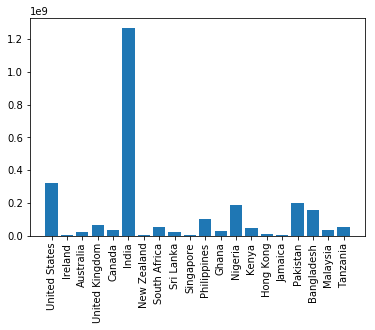

In [45]:
#Plot Population data for selected countries
plt.bar(factBook['Country'],factBook['Population'])
plt.xticks(rotation=90)

__As we see from the statistics and the plot India's population compared to the other countries is very large. In our future analysis while we are grouping the countries per population and check the relationship between the news topics that they are talking about, we can group the countries according to the order of magnitude of the population.__ 

In [46]:
Population=factBook[['Country','Population']]
Population.to_csv('../Data/Population.csv',index=False)

### Age_structure

In [47]:
factBook['Age_structure0-14']=factBook['Age_structure0-14'].astype('float')
factBook['Age_structure15-24']=factBook['Age_structure15-24'].astype('float')
factBook['Age_structure25-54']=factBook['Age_structure25-54'].astype('float')
factBook['Age_structure55-64']=factBook['Age_structure55-64'].astype('float')
factBook['Age_structureover65']=factBook['Age_structureover65'].astype('float')

Text(0,0.5,'Age_structure0-14')

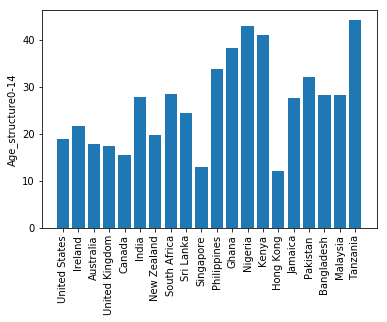

In [48]:
#Plot Age_structure0-14 for selected countries populations
plt.bar(factBook['Country'],factBook['Age_structure0-14'])
plt.xticks(rotation=90)
plt.ylabel('Age_structure0-14')

Text(0,0.5,'Age_structure15-24')

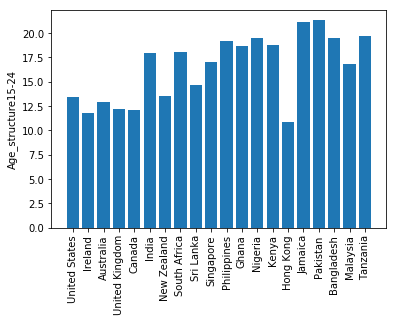

In [49]:
#Plot Age_structure15-24 for selected countries populations
plt.bar(factBook['Country'],factBook['Age_structure15-24'])
plt.xticks(rotation=90)
plt.ylabel('Age_structure15-24')

In [50]:
Age_structure15_24=factBook[['Country','Age_structure15-24']]
Age_structure15_24.to_csv('../Data/Age_structure15-24.csv',index=False)

### Religions

### Ethnic_groups

### Median age

In [51]:
factBook['Median_age']=factBook['Median_age'].astype('float')

In [52]:
factBook['Median_age'].describe()

count    20.000000
mean     30.085000
std       8.380194
min      17.600000
25%      23.400000
50%      27.900000
75%      37.825000
max      44.000000
Name: Median_age, dtype: float64

Text(0,0.5,'Median_age (years)')

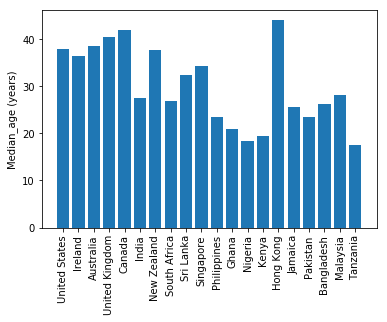

In [53]:
#Plot Median_age for selected countries populations
plt.bar(factBook['Country'],factBook['Median_age'])
plt.xticks(rotation=90)
plt.ylabel('Median_age (years)')

In [54]:
Median_age=factBook[['Country','Median_age']]
Median_age.to_csv('../Data/Median_age.csv',index=False)

### Population_growth_rate

In [55]:
factBook['Population_growth_rate']=factBook['Population_growth_rate'].astype('float')

In [56]:
factBook['Population_growth_rate'].describe()

count    20.000000
mean      1.284500
std       0.652812
min       0.350000
25%       0.800000
50%       1.120000
75%       1.645000
max       2.770000
Name: Population_growth_rate, dtype: float64

Text(0,0.5,'Population_growth_rate (%)')

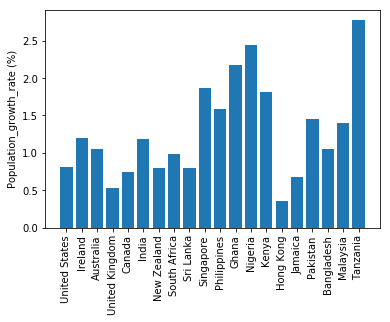

In [57]:
#Plot Population_growth_rate for selected countries number/1000
plt.bar(factBook['Country'],factBook['Population_growth_rate'])
plt.xticks(rotation=90)
plt.ylabel('Population_growth_rate (%)')

In [58]:
Population_growth_rate=factBook[['Country','Population_growth_rate']]
Population_growth_rate.to_csv('../Data/Population_growth_rate.csv',index=False)

### Birth_rate

(the average annual number of births during a year per 1,000 persons in the population at midyear)

In [59]:
factBook['Birth_rate']=factBook['Birth_rate'].astype('float')

In [60]:
factBook['Birth_rate'].describe()

count    20.000000
mean     18.975000
std       8.361055
min       8.400000
25%      12.400000
50%      18.500000
75%      22.725000
max      37.300000
Name: Birth_rate, dtype: float64

Text(0,0.5,'Birth Rate per 1000')

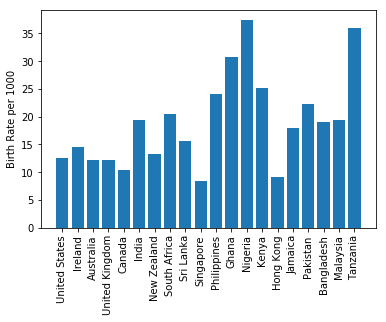

In [61]:
#Plot Birth_rate for selected countries number/1000
plt.bar(factBook['Country'],factBook['Birth_rate'])
plt.xticks(rotation=90)
plt.ylabel('Birth Rate per 1000')

In [62]:
Birth_rate=factBook[['Country','Birth_rate']]
Birth_rate.to_csv('../Data/Birth_rate.csv',index=False)

### Death_rate

In [63]:
factBook['Death_rate']=factBook['Death_rate'].astype('float')

In [64]:
factBook['Death_rate'].describe()

count    20.000000
mean      7.250000
std       1.910773
min       3.500000
25%       6.350000
50%       7.150000
75%       7.900000
max      12.700000
Name: Death_rate, dtype: float64

Text(0,0.5,'Death_rate per 1000')

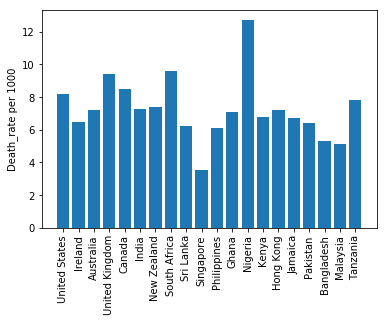

In [65]:
#Plot Death_rate for selected countries number/1000
plt.bar(factBook['Country'],factBook['Death_rate'])
plt.xticks(rotation=90)
plt.ylabel('Death_rate per 1000')

In [66]:
Death_rate=factBook[['Country','Death_rate']]
Death_rate.to_csv('../Data/Death_rate.csv',index=False)

### Net_migration_rate

In [67]:
#raw Net_migration_rate data
factBookCheck[12]

0      3.9 migrant(s)/1,000 population (2016 est.)
1        4 migrant(s)/1,000 population (2016 est.)
2      5.6 migrant(s)/1,000 population (2016 est.)
3      2.5 migrant(s)/1,000 population (2016 est.)
4      5.7 migrant(s)/1,000 population (2016 est.)
5        0 migrant(s)/1,000 population (2016 est.)
6      2.2 migrant(s)/1,000 population (2016 est.)
7     -0.9 migrant(s)/1,000 population (2016 est.)
8     -1.3 migrant(s)/1,000 population (2016 est.)
9     13.6 migrant(s)/1,000 population (2016 est.)
10      -2 migrant(s)/1,000 population (2016 est.)
11    -1.9 migrant(s)/1,000 population (2016 est.)
12    -0.2 migrant(s)/1,000 population (2016 est.)
13    -0.2 migrant(s)/1,000 population (2016 est.)
14     1.7 migrant(s)/1,000 population (2016 est.)
15    -4.5 migrant(s)/1,000 population (2016 est.)
16    -1.4 migrant(s)/1,000 population (2016 est.)
17    -3.1 migrant(s)/1,000 population (2016 est.)
18    -0.3 migrant(s)/1,000 population (2016 est.)
19    -0.5 migrant(s)/1,000 pop

In [68]:
factBook['Net_migration_rate']=factBook['Net_migration_rate'].astype('float')

In [69]:
factBook['Net_migration_rate'].describe()

count    20.000000
mean      1.145000
std       4.040124
min      -4.500000
25%      -1.325000
50%      -0.200000
75%       2.850000
max      13.600000
Name: Net_migration_rate, dtype: float64

Text(0,0.5,'Net_migration_rate per 1000')

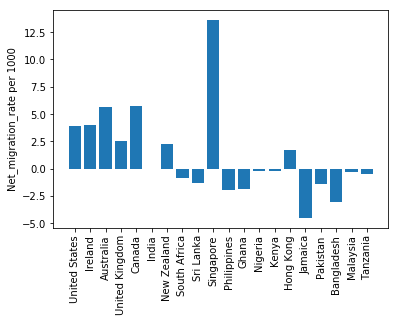

In [70]:
#Plot Net_migration_rate for selected countries number/1000
plt.bar(factBook['Country'],factBook['Net_migration_rate'])
plt.xticks(rotation=90)
plt.ylabel('Net_migration_rate per 1000')

In [71]:
Net_migration_rate=factBook[['Country','Net_migration_rate']]
Net_migration_rate.to_csv('../Data/Net_migration_rate.csv',index=False)

### Sex_ratio male/female

In [72]:
factBook['Sex_ratio']=factBook['Sex_ratio'].astype('float')

In [73]:
factBook['Sex_ratio'].describe()

count    20.000000
mean      0.992000
std       0.043359
min       0.870000
25%       0.970000
50%       0.990000
75%       1.010000
max       1.080000
Name: Sex_ratio, dtype: float64

Text(0,0.5,'Sex_ratio (male/female)')

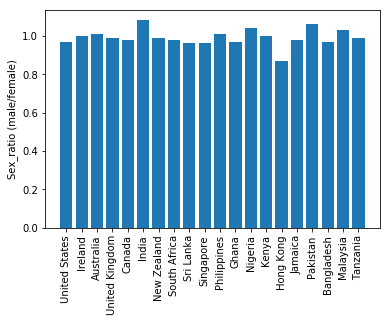

In [74]:
#Plot Sex_ratio (male/female) for selected countries populations
plt.bar(factBook['Country'],factBook['Sex_ratio'])
plt.xticks(rotation=90)
plt.ylabel('Sex_ratio (male/female)')

In [75]:
Sex_ratio=factBook[['Country','Sex_ratio']]
Sex_ratio.to_csv('../Data/Sex_ratio.csv',index=False)

### Life_expectancy_at_birth

In [76]:
#raw Life_expectancy_at_birth data
factBookCheck[14][2]

{'total population': {'text': '82.2 years'},
 'male': {'text': '79.8 years'},
 'female': {'text': '84.8 years (2016 est.)'}}

In [77]:
factBook['Life_expectancy_at_birth']=factBook['Life_expectancy_at_birth'].astype('float')

In [78]:
factBook['Life_expectancy_at_birth'].describe()

count    20.000000
mean     73.390000
std       8.702141
min      53.400000
25%      67.425000
50%      74.300000
75%      80.900000
max      85.000000
Name: Life_expectancy_at_birth, dtype: float64

Text(0,0.5,'Life_expectancy_at_birth (years)')

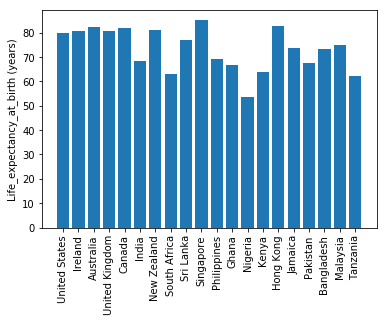

In [79]:
#Plot Sex_ratio (male/female) for selected countries populations
plt.bar(factBook['Country'],factBook['Life_expectancy_at_birth'])
plt.xticks(rotation=90)
plt.ylabel('Life_expectancy_at_birth (years)')

In [80]:
Life_expectancy_at_birth=factBook[['Country','Life_expectancy_at_birth']]
Life_expectancy_at_birth.to_csv('../Data/Life_expectancy_at_birth.csv',index=False)

### Executive_branch

### Legislative_branch

### Unemployment_rate

In [81]:
factBook['Unemployment_rate']

0      4.7
1        8
2      5.8
3      5.1
4      7.1
5      8.4
6      5.1
7     26.8
8      4.5
9      2.1
10     6.6
11     5.2
12    23.9
13      40
14     3.6
15    13.8
16     6.7
17     4.9
18     3.3
19      NA
Name: Unemployment_rate, dtype: object

In [82]:
# we have one missing value in Tanzania, we can find it from another source or remove this country from the analysis
# for now, we provided the statistics and plots by excluding this specific country
factBook['Unemployment_rate']=factBook['Unemployment_rate'].replace('NA','-1')
factBook['Unemployment_rate']=factBook['Unemployment_rate'].astype('float')

In [83]:
factBook[factBook['Unemployment_rate']!=-1]['Unemployment_rate'].describe()

count    19.000000
mean      9.768421
std       9.853372
min       2.100000
25%       4.800000
50%       5.800000
75%       8.200000
max      40.000000
Name: Unemployment_rate, dtype: float64

Text(0,0.5,'Unemployement Rate %')

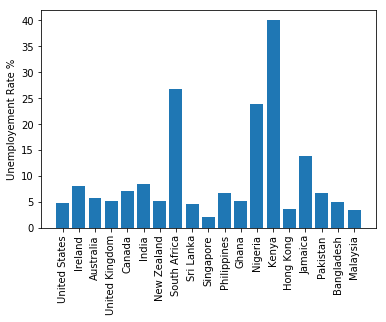

In [84]:
#Plot Unemployement Rate for selected countries except nan values
plt.bar(factBook[factBook['Unemployment_rate']!=-1]['Country'],factBook[factBook['Unemployment_rate']!=-1]['Unemployment_rate'])
plt.xticks(rotation=90)
plt.ylabel('Unemployement Rate %')

__Unemployement percentages of the countries changes from 2.1% to 40% of the population. In this data we have values from years ranging from 2006 to 2017. 
We will check if the values belong to earlier than 2015 is consistant or not from the Internet then update the results before correlating with the news data.__ 

In [85]:
Unemployment_rate=factBook[['Country','Unemployment_rate']]
Unemployment_rate.to_csv('../Data/Unemployment_rate.csv',index=False)

### Population_below_poverty_line

In [86]:
factBook['Population_below_poverty_line']

0                         {'text': '15.1% (2010 est.)'}
1                          {'text': '8.2% (2013 est.)'}
2                                       {'text': 'NA%'}
3                           {'text': '15% (2013 est.)'}
4     {'text': '9.4%', 'note': {'text': 'this figure...
5                         {'text': '29.8% (2010 est.)'}
6                                       {'text': 'NA%'}
7                         {'text': '35.9% (2012 est.)'}
8                          {'text': '8.9% (2010 est.)'}
9                                       {'text': 'NA%'}
10                        {'text': '25.2% (2012 est.)'}
11                        {'text': '24.2% (2013 est.)'}
12                          {'text': '70% (2010 est.)'}
13                        {'text': '43.4% (2012 est.)'}
14                        {'text': '19.6% (2012 est.)'}
15                        {'text': '16.5% (2009 est.)'}
16                      {'text': '22.3% (FY2005 est.)'}
17                        {'text': '31.5% (2010 

Since the data time changes from 2005 to 2013 we decided not to use this feature of the data set to correlate with news data.

### Inflation_rate (%)

In [87]:
factBook['Inflation_rate']=factBook['Inflation_rate'].astype('float')

In [88]:
factBook['Inflation_rate'].describe()

count    20.000000
mean      4.185000
std       4.754198
min      -0.800000
25%       1.375000
50%       2.550000
75%       5.600000
max      17.800000
Name: Inflation_rate, dtype: float64

Text(0,0.5,'Inflation_rate (%)')

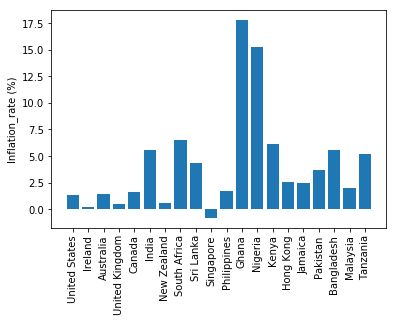

In [89]:
#Plot Inflation_rate (%) for selected countries 
plt.bar(factBook['Country'],factBook['Inflation_rate'])
plt.xticks(rotation=90)
plt.ylabel('Inflation_rate (%)')

In [90]:
Inflation_rate=factBook[['Country','Inflation_rate']]
Inflation_rate.to_csv('../Data/Inflation_rate.csv',index=False)

### GDP_per_capita

In [91]:
factBook['GDP_per_capita'].describe()

count       20.000000
mean     27365.000000
std      26282.479155
min       3100.000000
25%       5700.000000
50%      12200.000000
75%      46850.000000
max      87100.000000
Name: GDP_per_capita, dtype: float64

Text(0,0.5,'GDP_per_capita')

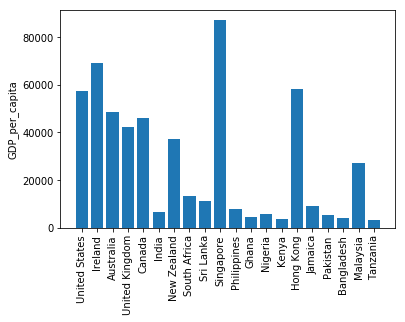

In [92]:
#Plot GDP per capita for selected countries
plt.bar(factBook['Country'],factBook['GDP_per_capita'])
plt.xticks(rotation=90)
plt.ylabel('GDP_per_capita')

__As we see from the statistics and the plot GDP per capita difference changes from 3100 to 87100. In this feature we can check the percentage of topics on the news vs GDP after normalizizng the GDP data. We can also group the countries by 25%, 50% and 75% percentiles values.__ 

In [93]:
GDP_per_capita=factBook[['Country','GDP_per_capita']]
GDP_per_capita.to_csv('../Data/GDP_per_capita.csv',index=False)

### Electricity_renewable_sources

In [94]:
factBook['Electricity_renewable_sources']=factBook['Electricity_renewable_sources'].astype('float')

In [95]:
factBook['Electricity_renewable_sources'].describe()

count    20.000000
mean      6.435000
std       6.887385
min       0.000000
25%       0.625000
50%       4.900000
75%      11.375000
max      25.000000
Name: Electricity_renewable_sources, dtype: float64

Text(0,0.5,'Electricity from renewable sources (%)')

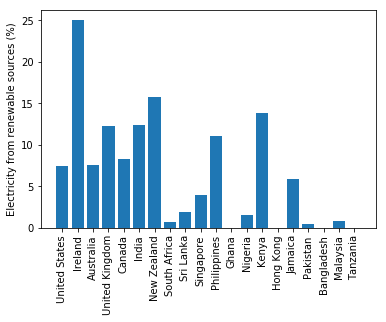

In [96]:
#Plot Percentage of Electricity from renewable sources¶ (%) for selected countries 
plt.bar(factBook['Country'],factBook['Electricity_renewable_sources'])
plt.xticks(rotation=90)
plt.ylabel('Electricity from renewable sources (%)')

In [97]:
Electricity_renewable_sources=factBook[['Country','Electricity_renewable_sources']]
Electricity_renewable_sources.to_csv('../Data/Electricity_renewable_sources.csv',index=False)

### Carbon dioxide emissions from consumption of energy

(This entry is the total amount of carbon dioxide, measured in metric tons, released by burning fossil fuels in the process of producing and consuming energy.)

In [98]:
factBook['Carbon_dioxide_emissions']=factBook['Carbon_dioxide_emissions'].astype('float')

In [99]:
factBook.loc[factBook['Carbon_dioxide_emissions']<6,'Carbon_dioxide_emissions']= factBook[factBook['Carbon_dioxide_emissions']<6]['Carbon_dioxide_emissions']*1000

In [100]:
factBook['Carbon_dioxide_emissions'].describe()

count      20.000000
mean      516.615000
std      1226.249218
min        10.000000
25%        29.500000
50%        93.500000
75%       409.250000
max      5402.000000
Name: Carbon_dioxide_emissions, dtype: float64

Text(0,0.5,'Carbon dioxide emissions from consumption of energy in metric tons')

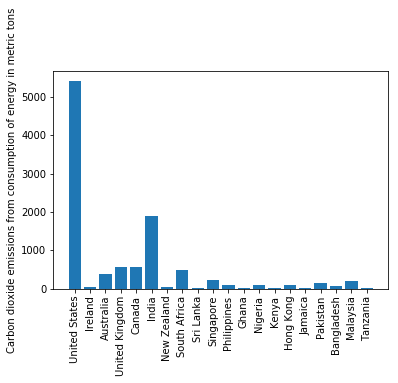

In [101]:
#Plot Carbon dioxide emissions from consumption of energy in metric tons for selected countries 
plt.bar(factBook['Country'],factBook['Carbon_dioxide_emissions'])
plt.xticks(rotation=90)
plt.ylabel('Carbon dioxide emissions from consumption of energy in metric tons')

As we see there are two countries having very large amount of co2 emission compared to the others. We can see the correlations between percentage of news on environmental issues vs co2 emmision.

In [102]:
carbondioxit=factBook[['Country','Carbon_dioxide_emissions']]
carbondioxit.to_csv('../Data/Carbon_dioxide_emissions.csv',index=False)

### Internet_users

The percent of population with Internet access (i.e., the penetration rate) helps gauge how widespread Internet use is within a country. Statistics vary from country to country and may include users who access the Internet at least several times a week to those who access it only once within a period of several months

In [103]:
factBook['Internet_users']=factBook['Internet_users'].astype('float')

In [104]:
factBook['Internet_users'].describe()

count    20.000000
mean     54.615000
std      28.845966
min       5.400000
25%      29.000000
50%      49.650000
75%      82.725000
max      92.000000
Name: Internet_users, dtype: float64

Text(0,0.5,'Internet User Percentage')

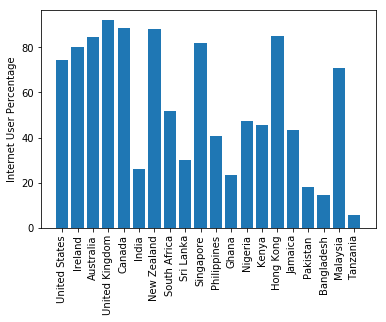

In [105]:
#Plot Internet User percentage for selected countries 
plt.bar(factBook['Country'],factBook['Internet_users'])
plt.xticks(rotation=90)
plt.ylabel('Internet User Percentage')

As we se from the above plot we can divide the internet user groups to above %80, between %50-80, and below %50. Then we can correlate this data with news topic of corresponding country group. It can also be compared to number of news resourse data.

In [106]:
factBook['Internet_users']

0     74.6
1     80.1
2     84.6
3     92.0
4     88.5
5     26.0
6     88.2
7     51.9
8     30.0
9     82.1
10    40.7
11    23.5
12    47.4
13    45.6
14    85.0
15    43.2
16    18.0
17    14.4
18    71.1
19     5.4
Name: Internet_users, dtype: float64

In [107]:
Internetuser=factBook[['Country','Internet_users']]
Internetuser.to_csv('../Data/Internet_users.csv',index=False)

All data

In [109]:
AllFacts=factBook[['Country','Population',
        'Age_structure0-14',
        'Age_structure15-24',
        'Age_structure25-54',
        'Age_structure55-64',
        'Age_structureover65',
        'Median_age',
        'Population_growth_rate',
        'Birth_rate',
        'Death_rate',
        'Net_migration_rate',
        'Sex_ratio',
        'Life_expectancy_at_birth',
        #'Executive_branch',
        #'Legislative_branch',
        'GDP_per_capita',
        'Unemployment_rate',
        #'Population_below_poverty_line',
        'Inflation_rate',
        'Electricity_renewable_sources',
        'Carbon_dioxide_emissions',
        'Internet_users',
        'Religions',
        'Ethnic_groups']]
AllFacts.to_csv('../Data/AllFacts.csv',index=False)

In [118]:
factBook['Religions'][0]
factBook['Religions'][1]

'Roman Catholic 84.7%, Church of Ireland 2.7%, other Christian 2.7%, Muslim 1.1%, other 1.7%, unspecified 1.5%, none 5.7% (2011 est.)'